In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart_disease_uci.csv') 

In [3]:
df.head()   

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

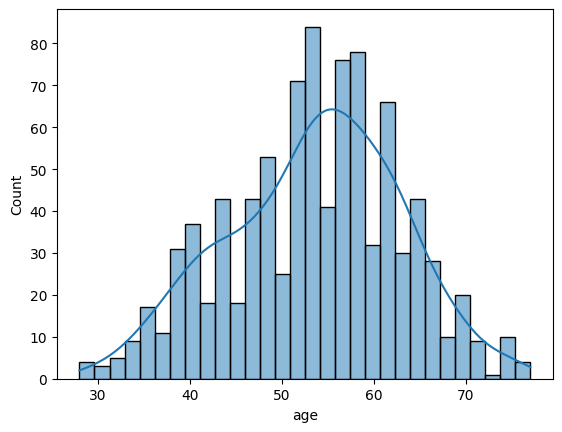

In [6]:
# histogram for age
sns.histplot(df['age'], kde=True, bins=30)

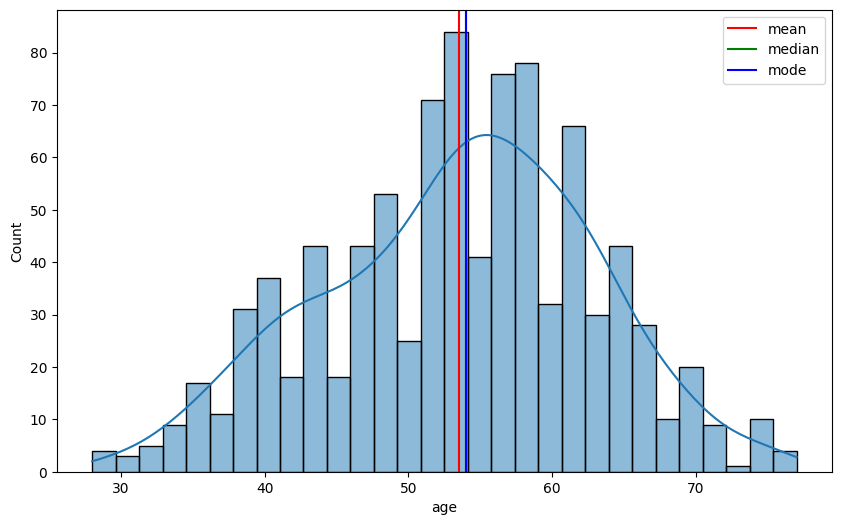

In [7]:
# plot the mean, median and mode using a sns
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].median(), color='green', label='median')
plt.axvline(df['age'].mode()[0], color='blue', label='mode')
plt.legend()



most people getting heart disease at 53-54 years.

In [8]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [9]:
male=726
female=194

total=male+female

p_female=(194)/total*100
p_male=(726)/total*100

print(f"Percentage of female is: {p_female:.2f} %")
print(f"Percentage of male is: {p_male:.2f} %")


Percentage of female is: 21.09 %
Percentage of male is: 78.91 %


In [10]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

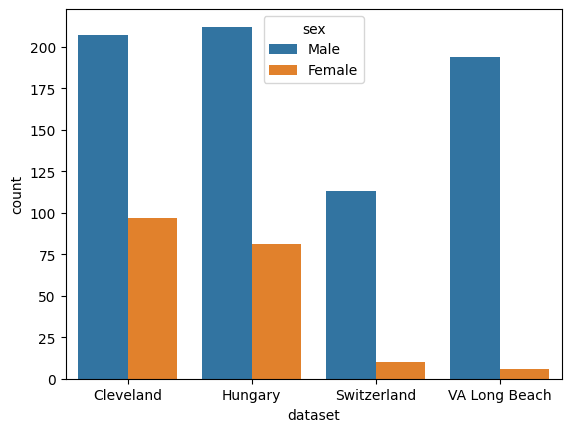

In [11]:
sns.countplot(data=df, x='dataset', hue='sex')

In [13]:
fig=px.bar(df,x='dataset', color='sex')
fig.show()

In [15]:
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [17]:
fig=px.histogram(df,x='age', color='dataset')
fig.show()

cp(Chest pain)

In [19]:
fig=px.histogram(df,x='age', color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

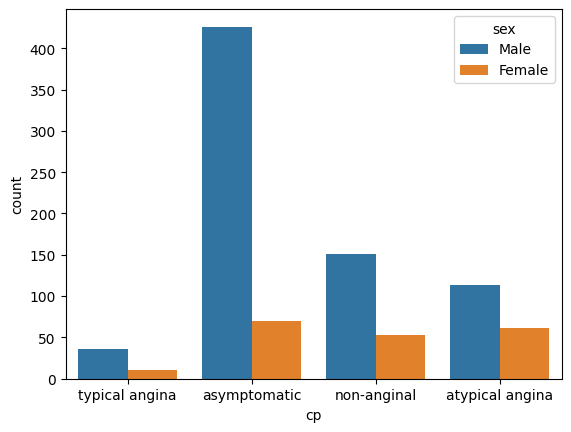

In [21]:
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

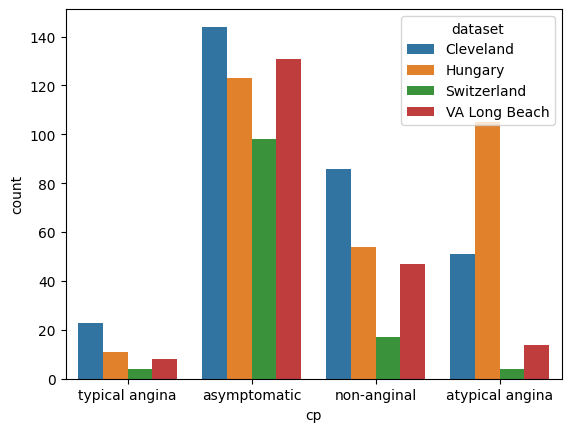

In [22]:
sns.countplot(df,x='cp',hue='dataset')

trestbps (Resting Blood Pressure)

In [42]:
missing_data_cols=df.isnull().sum()[df.isnull().sum()>0].index.tolist()

categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
numerical=df.select_dtypes(include=['float64','int64']).columns.tolist()

# fill missing using for loop of categorical columns and numerical columns
for col in missing_data_cols:
    if col in categorical_columns:
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### output

1. Percentage of female is: 21.09 % and Percentage of male is: 78.91 %
2. minimum age to have heart disease is 28 years.
3. most people getting heart disease at 53-54 years.
4. We have the highest number of patients from cleveland (304) and from switzerland (123).
5. Most males are from Hungry (212).
6. Most females are from cleveland (97).
